## Статистический вывод

### Построение доверительного интервала

In [ ]:
# вновь воспользуемся нашими данными о росте
import numpy as np
np.random.seed(42)
height = list(np.round(np.random.normal(180, 10, 1000)))

In [ ]:
print(height)

[185.0, 179.0, 186.0, 195.0, 178.0, 178.0, 196.0, 188.0, 175.0, 185.0, 175.0, 175.0, 182.0, 161.0, 163.0, 174.0, 170.0, 183.0, 171.0, 166.0, 195.0, 178.0, 181.0, 166.0, 175.0, 181.0, 168.0, 184.0, 174.0, 177.0, 174.0, 199.0, 180.0, 169.0, 188.0, 168.0, 182.0, 160.0, 167.0, 182.0, 187.0, 182.0, 179.0, 177.0, 165.0, 173.0, 175.0, 191.0, 183.0, 162.0, 183.0, 176.0, 173.0, 186.0, 190.0, 189.0, 172.0, 177.0, 183.0, 190.0, 175.0, 178.0, 169.0, 168.0, 188.0, 194.0, 179.0, 190.0, 184.0, 174.0, 184.0, 195.0, 180.0, 196.0, 154.0, 188.0, 181.0, 177.0, 181.0, 160.0, 178.0, 184.0, 195.0, 175.0, 172.0, 175.0, 189.0, 183.0, 175.0, 185.0, 181.0, 190.0, 173.0, 177.0, 176.0, 165.0, 183.0, 183.0, 180.0, 178.0, 166.0, 176.0, 177.0, 172.0, 178.0, 184.0, 199.0, 182.0, 183.0, 179.0, 161.0, 180.0, 181.0, 205.0, 178.0, 183.0, 180.0, 168.0, 191.0, 188.0, 188.0, 171.0, 194.0, 166.0, 186.0, 202.0, 170.0, 174.0, 181.0, 175.0, 164.0, 181.0, 169.0, 185.0, 171.0, 195.0, 172.0, 177.0, 188.0, 168.0, 182.0, 193.0, 164.0

In [ ]:
# теперь нам понадобится модуль stats библиотеки scypy (Scientific Python)
import scipy.stats as st

In [ ]:
# создадим 90-процентный доверительный интервал (confidence interval, ci)
ci = st.norm.interval(confidence = 0.90, loc = np.mean(height), scale = st.sem(height))

# теперь округлим до трех знаков после запятой и выведем результат
print(np.round(ci, 2))

[179.69 180.71]


### Проверка гипотезы

In [ ]:
# вспомним какое было среднее значение выборки
height_mean = np.mean(height)
print(np.round(height_mean, 2))

180.2


In [ ]:
# теперь будем использовать ttest_1samp, которому передадим нашу выборку и
# предполагаемое истинное среднее 182 см
t_statistic, p_value = st.ttest_1samp(height, 182)

# переменная pvalue как раз и содержит нужную нам вероятность
print(p_value)

9.035492171563733e-09


In [ ]:
# теперь напишем небольшую программу, которая скажет отвергнуть нулевую гипотезу или нет
if p_value < 0.05:    # пороговым значением мы выбрали 0,05 или 5%
   print("Есть основания отвергнуть нулевую гипотезу")
else:
  print("Нет оснований отвергнуть нулевую гипотезу")

Есть основания отвергнуть нулевую гипотезу


### Упражнения

#### Доверительный интервал

In [2]:
# возьмем данные по банковским вкладам из упражнений предыдущего занятия
np.random.seed(42)
deposits = list(np.round(np.random.normal(300, 90, 1000)))
print(deposits)

[np.float64(345.0), np.float64(288.0), np.float64(358.0), np.float64(437.0), np.float64(279.0), np.float64(279.0), np.float64(442.0), np.float64(369.0), np.float64(258.0), np.float64(349.0), np.float64(258.0), np.float64(258.0), np.float64(322.0), np.float64(128.0), np.float64(145.0), np.float64(249.0), np.float64(209.0), np.float64(328.0), np.float64(218.0), np.float64(173.0), np.float64(432.0), np.float64(280.0), np.float64(306.0), np.float64(172.0), np.float64(251.0), np.float64(310.0), np.float64(196.0), np.float64(334.0), np.float64(246.0), np.float64(274.0), np.float64(246.0), np.float64(467.0), np.float64(299.0), np.float64(205.0), np.float64(374.0), np.float64(190.0), np.float64(319.0), np.float64(124.0), np.float64(180.0), np.float64(318.0), np.float64(366.0), np.float64(315.0), np.float64(290.0), np.float64(273.0), np.float64(167.0), np.float64(235.0), np.float64(259.0), np.float64(395.0), np.float64(331.0), np.float64(141.0), np.float64(329.0), np.float64(265.0), np.float64(

**Задание 1**. Пусть представленные данные - выборка, а вы хотите сделать вывод о генеральной совокупности (всех вкладах в Украине). Постройте 95% доверительный интервал среднего размера банковского вклада.

In [3]:
import scipy.stats as st
import numpy as np

ci = st.norm.interval(confidence=0.95, loc=np.mean(deposits), scale=st.sem(deposits))
ci

(np.float64(296.27730717091725), np.float64(307.2006928290827))

#### Проверка гипотезы

Предположим, что вы прочитали в газете, что средний размер депозита составляет 306 тысяч рублей и с помощью выборочных данных, которые у вас есть, вы хотите это проверить.

**Задание 2**. Сформулируйте нулевую и альтернативную гипотезы.

A0 - средний размер депозита составлсяет 306 тис
А1 != А0

**Задание 3**. Вычислите p-value.

In [6]:
import scipy.stats as st

t_statistic, p_value = st.ttest_1samp(deposits, 306)
p_value

np.float64(0.12655929855053344)

**Задание 4**. При пороговом значении в 10%, сделайте вывод о возможности либо невозможности отвергнуть нулевую гипотезу.

In [5]:
if p_value > 0.10:
    print("Yes")


Yes


### Дополнительные материалы

Экспоненциальная запись

In [ ]:
9.035492171563733 * 10**(-9)

9.035492171563733e-09

Распределение Стьюдента

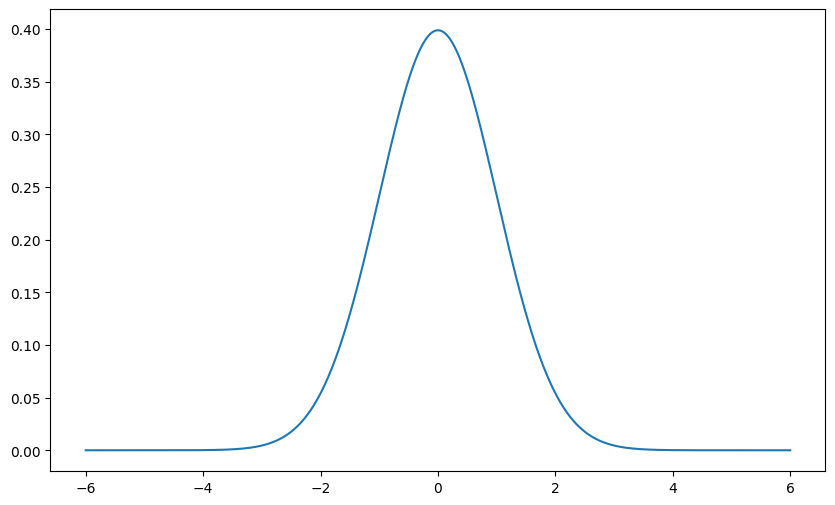

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import t

# зададим размер графика
plt.figure(figsize = (10,6))

# зададим распределение Стьюдента с 999 степенями свободы
x = np.linspace(-6, 6, 1000)
f = t.pdf(x, len(height) - 1)

# построим график
plt.plot(x, f)
plt.show()

In [ ]:
# рассчитаем площадь слева от -5.797229652505048 и справа от 5.797229652505048
t.cdf(x = t_statistic, df = len(height) - 1) * 2

9.035492171563733e-09

Расчет моды

In [ ]:
# импортируем класс Counter
from collections import Counter

# создадим объект этого класса, передав ему список с данными о росте
bow = Counter(height)

# выведем шесть наиболее часто встречающихся значений с помощью метода .most_common()
bow.most_common(6)

[(182.0, 50), (175.0, 46), (180.0, 45), (183.0, 44), (186.0, 40), (178.0, 39)]

In [ ]:
# рассчитаем моду с помощью функции mode()
from statistics import mode
mode(height)

182.0